In [ ]:
import sympy as sp
from IPython.display import display, Math

# Variable t
alpha = sp.Symbol('α',real=True, positive=True, domain=(0, sp.pi))
aspect_rat = sp.Symbol('r_aspect',real=True)
throw_rat = sp.Symbol('r_throw',real=True)
height = (alpha/sp.pi) *1/(throw_rat*aspect_rat)
widths = 1

tau  = sp.Symbol('τ',real=True)
lamba =  sp.Symbol('λ',real=True)

y  = sp.Symbol('y',real=True)
x =  sp.Symbol('x',real=True)
coord =   sp.Matrix([x, y])

display(Math(r"α ={α \in \mathbb{R}, \quad 0 < α < \pi}"))
#position fly = origin
fly =  sp.Matrix([0, 0])

# sherical curve
spherical_curve = sp.Matrix([sp.cos(alpha), sp.sin(alpha)])
display(Math(f'Fly ={sp.latex(spherical_curve)}'))
#(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

d = sp.Symbol('d_proj',real=True)

#position projector 
projector =  sp.Matrix([d, 0])
screen_line =  sp.Matrix([1, height])

display(Math(f'Projector ={sp.latex(screen_line)}'))
equation2 = sp.Eq(spherical_curve+fly,screen_line+projector)
display(Math(f'Intersection = {sp.latex(equation2)}'))

equation = sp.Eq(tau*spherical_curve+fly,lamba*screen_line+projector)

display(Math(f' Intersection = {sp.latex(equation)}'))


solution = sp.solve(equation, (tau, lamba))

#print(sp.simplify(solution))

# Einsetzen von tau in equation_left
equation_left = (solution[tau] * spherical_curve)

# Fortsetzen der Gleichung mit substituiertem tau
coord_equation = sp.Eq(coord, equation_left)


solution = sp.solve(coord_equation , (x, y))
print(sp.simplify(solution))

display(Math(f'coordinates = {sp.latex(solution)}'))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

{x: d_proj*α*cos(α)/(-pi*r_aspect*r_throw*sin(α) + α*cos(α)), y: d_proj*α*sin(α)/(-pi*r_aspect*r_throw*sin(α) + α*cos(α))}


<IPython.core.display.Math object>

Given: Fly @ Position (0,0) Projector @ Position (d_proj,0) and   
$$ α = α \in \mathbb{R}, \quad 0 < α < \pi  $$

$$ \vec{Fly(α)} =\left[\begin{matrix}\cos{\left( α \right)}\\\sin{\left(α \right)}\end{matrix}\right] + \left[\begin{matrix}0\\0\end{matrix}\right] $$

$$ \vec{Projector(α)} =\left[\begin{matrix}1\\\frac{α}{\pi r_{aspect} r_{throw}}\end{matrix}\right] + \left[\begin{matrix}d_{proj}\\0\end{matrix}\right] $$

$$ \vec{Intersection(α)} = τ\left[\begin{matrix}\cos{\left( α \right)}\\\sin{\left( α \right)}\end{matrix}\right] = λ\left[\begin{matrix}1 + d_{proj}\\\frac{α}{\pi r_{aspect} r_{throw}}\end{matrix}\right]$$

$$\vec{ coordinates(α) }= \left[\begin{matrix}x\\y\end{matrix}\right] = \left[\begin{matrix}- \frac{d_{proj} α \cos{\left( α \right)}}{\pi r_{aspect} r_{throw} \sin{\left( α \right)} - α \cos{\left( α \right)}}\\- \frac{d_{proj} α \sin{\left( α \right)}}{\pi r_{aspect} r_{throw} \sin{\left( α \right)} - α \cos{\left( α \right)}}\end{matrix}\right]$$

(100, 100) (100, 100) (100, 100)


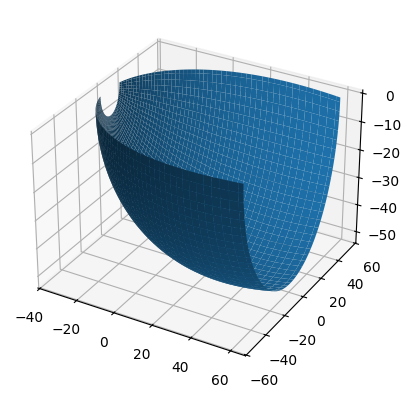

In [1]:
import numpy as np
import pylab as plt
import numpy as np
%matplotlib inline

#elevation
angle_start_e = 15
angle_stop_e = 140

#azimuth
angle_start_a = 0
angle_stop_a = 180

a = np.linspace(np.deg2rad(angle_start_e),np.deg2rad(angle_stop_e),100)
b = np.linspace(np.deg2rad(angle_start_a),np.deg2rad(angle_stop_a),100)

d_proj = 200
r_aspect =16/9
r_throw =1.2

c = np.ones(100)

x = np.outer(c,d_proj*a*np.cos(a)/(-np.pi*r_aspect*r_throw*np.sin(a) + a*np.cos(a)))
y = np.outer(np.cos(b),d_proj*a*np.sin(a)/(-np.pi*r_aspect*r_throw*np.sin(a) + a*np.cos(a)))
z = np.outer(np.sin(b),d_proj*a*np.sin(a)/(-np.pi*r_aspect*r_throw*np.sin(a) + a*np.cos(a)))

print(x.shape,y.shape,z.shape)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, z, linewidth=0.01, antialiased=True)
plt.show()

